In [2]:
import pandas as pd
import numpy as np
import os, sys

os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

In [29]:
# Construct the file path
file_path = os.path.join(rpath, 'data', 'BrentOilPrices.csv')

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)
data.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [30]:
data['Date'] = pd.to_datetime(data['Date'])
# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Resample the data to monthly frequency, taking the average price for each month
monthly_data = data['Price'].resample('M').mean()
monthly_data.index = monthly_data.index.strftime('%Y-%m')
# Display the first few rows of the monthly data
monthly_data.head()


C:\Users\Bereket\AppData\Local\Temp\ipykernel_10124\1686388892.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\Bereket\AppData\Local\Temp\ipykernel_10124\1686388892.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Price'].resample('M').mean()


Date
1987-05    18.580000
1987-06    18.860476
1987-07    19.856522
1987-08    18.979524
1987-09    18.313182
Name: Price, dtype: float64

In [31]:
file_path = os.path.join(rpath, 'data', 'MonthlyBrentOilPrices.csv')
monthly_data.to_csv(file_path)


In [49]:
# Construct the file path
file_path = os.path.join(rpath, 'data', 'MonthlyBrentOilPrices.csv')

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)
data.head()

,Date,Price
0,1987-05,18.580000
1,1987-06,18.860476
2,1987-07,19.856522
3,1987-08,18.979524
4,1987-09,18.313182


In [36]:
# Create the events DataFrame
events = pd.DataFrame({
    'Event Date': ['1990-08-02', '2001-09-11', '2008-09-15', '2020-03-09'],
    'Event Name': ['Iraq Invades Kuwait', '9/11 Attacks', 'Lehman Brothers Collapse', 'Oil Price War'],
    'Description': [
        'Iraq’s invasion of Kuwait leads to Gulf War, impacting oil supply.',
        'Terrorist attacks in the U.S. trigger economic instability.',
        'Global financial crisis begins, causing a severe demand drop.',
        'Price war between Russia and Saudi Arabia amid COVID-19 pandemic.'
    ]
})

# Convert 'Event Date' to datetime format
events['Date'] = pd.to_datetime(events['Event Date'])

# Format 'Event Date' to show only the year and month (YYYY-MM)
events['Date'] = events['Date'].dt.strftime('%Y-%m')

# Display the first few rows of the events DataFrame
events.head()


,Event Date,Event Name,Description,Date
0,1990-08-02,Iraq Invades Kuwait,"Iraq’s invasion of Kuwait leads to Gulf War, i...",1990-08
1,2001-09-11,9/11 Attacks,Terrorist attacks in the U.S. trigger economic...,2001-09
2,2008-09-15,Lehman Brothers Collapse,"Global financial crisis begins, causing a seve...",2008-09
3,2020-03-09,Oil Price War,Price war between Russia and Saudi Arabia amid...,2020-03


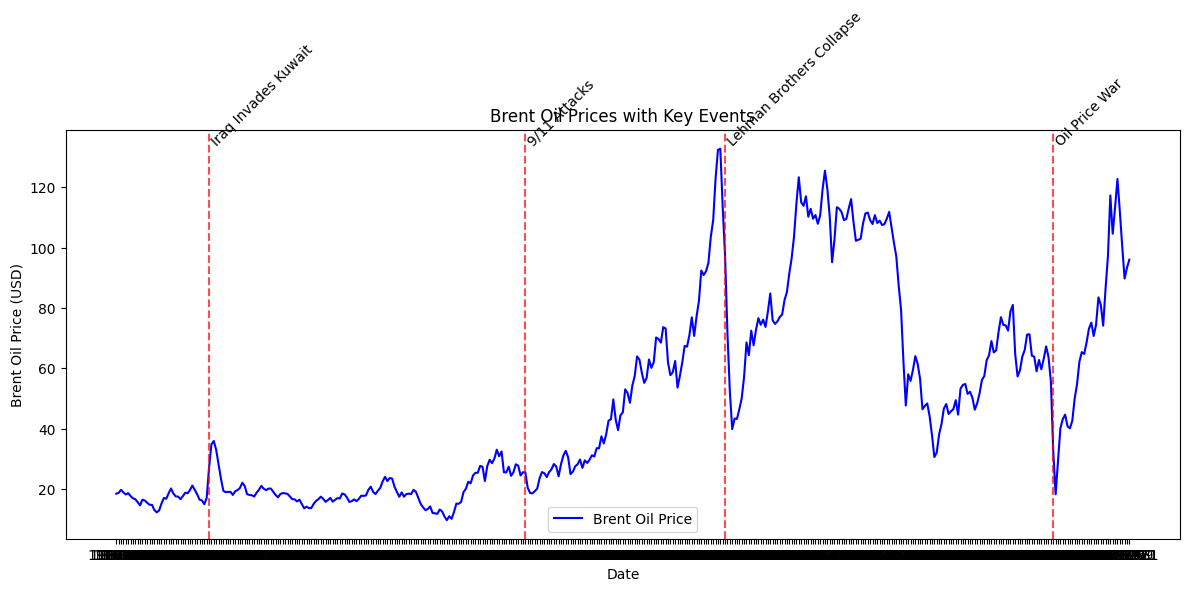

In [40]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Brent Oil Price', color='blue')

# Annotate events on the plot
for i, row in events.iterrows():
    plt.axvline(row['Date'], color='red', linestyle='--', alpha=0.7)
    plt.text(row['Date'], data['Price'].max(), row['Event Name'], rotation=45, verticalalignment='bottom')

# Labels and legend
plt.xlabel('Date')
plt.ylabel('Brent Oil Price (USD)')
plt.title('Brent Oil Prices with Key Events')
plt.legend()
plt.tight_layout()
plt.show()

In [43]:
# Construct the file path
file_path = os.path.join(rpath, 'data', 'UNRATE.csv')

# Read the CSV file into a DataFrame
unrate_data = pd.read_csv(file_path)
unrate_data.head()

,DATE,UNRATE
0,1/1/1978,6.4
1,2/1/1978,6.3
2,3/1/1978,6.3
3,4/1/1978,6.1
4,5/1/1978,6.0


In [51]:
# Construct the file path
file_path = os.path.join(rpath, 'data', 'GDP.csv')

# Read the CSV file into a DataFrame
gdp_data = pd.read_csv(file_path)
gdp_data.head()

,DATE,GDP
0,1987-01-01,4722.156
1,1987-04-01,4806.160
2,1987-07-01,4884.555
3,1987-10-01,5007.994
4,1988-01-01,5073.372


In [50]:
brent_data = data.copy()
brent_data = brent_data.set_index('Date')
brent_data

,Price
Date,
1987-05,18.580000
1987-06,18.860476
1987-07,19.856522
1987-08,18.979524
1987-09,18.313182
...,...
2022-07,111.925714
2022-08,100.446364
2022-09,89.764762


In [52]:
# Convert 'Event Date' to datetime format
gdp_data['DATE'] = pd.to_datetime(gdp_data['DATE'])

# Format 'Event Date' to show only the year and month (YYYY-MM)
gdp_data['DATE'] = gdp_data['DATE'].dt.strftime('%Y-%m')
gdp_data=gdp_data.set_index('DATE')
gdp_data

,GDP
DATE,
1987-01,4722.156
1987-04,4806.160
1987-07,4884.555
1987-10,5007.994
1988-01,5073.372
...,...
2023-07,27967.697
2023-10,28296.967
2024-01,28624.069


In [46]:
# Convert 'Event Date' to datetime format
unrate_data['DATE'] = pd.to_datetime(unrate_data['DATE'])

# Format 'Event Date' to show only the year and month (YYYY-MM)
unrate_data['DATE'] = unrate_data['DATE'].dt.strftime('%Y-%m')
unrate_data=unrate_data.set_index('DATE')
unrate_data

,UNRATE
DATE,
1978-01,6.4
1978-02,6.3
1978-03,6.3
1978-04,6.1
1978-05,6.0
...,...
2024-06,4.1
2024-07,4.3
2024-08,4.2


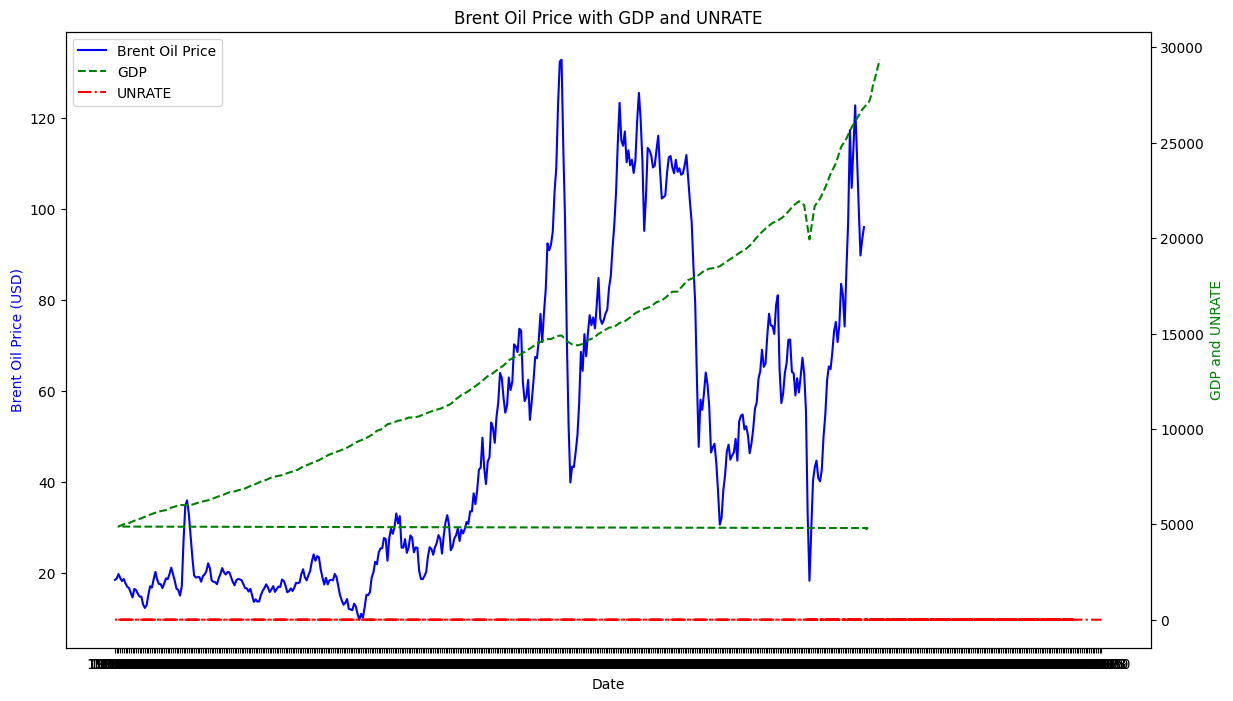

In [54]:
import matplotlib.pyplot as plt

# Plotting without merging
plt.figure(figsize=(14, 8))

# Plot Brent Oil Price
plt.plot(brent_data.index, brent_data['Price'], label='Brent Oil Price', color='blue')

# Plot GDP on the same plot with a secondary y-axis
ax1 = plt.gca()  # Get current axis for Brent Oil Price
ax2 = ax1.twinx()  # Create a twin y-axis for GDP and UNRATE
ax2.plot(gdp_data.index, gdp_data['GDP'], label='GDP', color='green', linestyle='--')

# Plot UNRATE on the secondary y-axis
ax2.plot(unrate_data.index, unrate_data['UNRATE'], label='UNRATE', color='red', linestyle='-.')

# Adding labels and legends
ax1.set_xlabel('Date')
ax1.set_ylabel('Brent Oil Price (USD)', color='blue')
ax2.set_ylabel('GDP and UNRATE', color='green')

# Create separate legends for each axis
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Display the plot
plt.title('Brent Oil Price with GDP and UNRATE')
plt.show()
